In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [9]:

# Load the dataset
data = pd.read_csv('E:\python\AAPL.csv')

In [11]:
# Data preprocessing
# Convert Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])


In [66]:
# Check for missing values
print(data.isnull().sum())

# Remove rows with missing values
data.dropna(inplace=True)

# Verify that there are no missing values
print(data.isnull().sum())


Date           0
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
MA_50         49
MA_200       199
dtype: int64
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
MA_50        0
MA_200       0
dtype: int64


In [13]:
# EDA
print("Exploratory Data Analysis:")
print(data.head())
print(data.info())
print(data.describe())

Exploratory Data Analysis:
        Date      Open      High       Low     Close  Adj Close     Volume
0 1980-12-12  0.513393  0.515625  0.513393  0.513393   0.406782  117258400
1 1980-12-15  0.488839  0.488839  0.486607  0.486607   0.385558   43971200
2 1980-12-16  0.453125  0.453125  0.450893  0.450893   0.357260   26432000
3 1980-12-17  0.462054  0.464286  0.462054  0.462054   0.366103   21610400
4 1980-12-18  0.475446  0.477679  0.475446  0.475446   0.376715   18362400
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9909 entries, 0 to 9908
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       9909 non-null   datetime64[ns]
 1   Open       9909 non-null   float64       
 2   High       9909 non-null   float64       
 3   Low        9909 non-null   float64       
 4   Close      9909 non-null   float64       
 5   Adj Close  9909 non-null   float64       
 6   Volume     9909 non-null   int64    

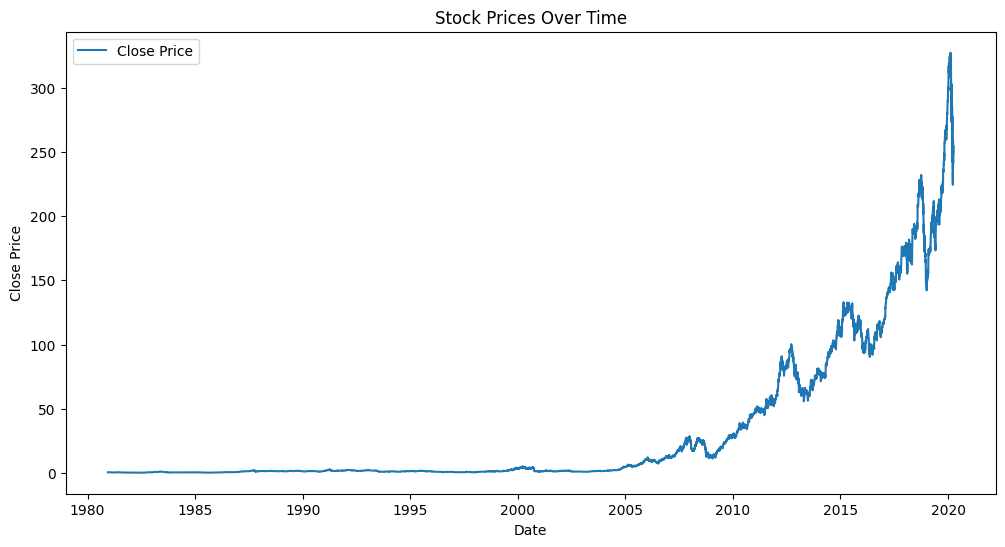

In [14]:
# Plotting stock prices over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


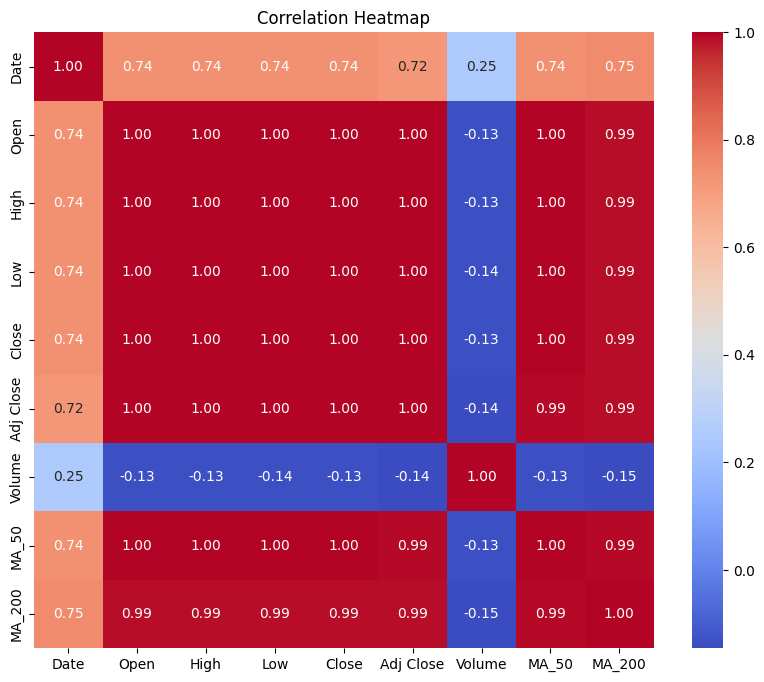

In [54]:
# Plotting Correlation Heatmap
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<Figure size 1000x800 with 0 Axes>

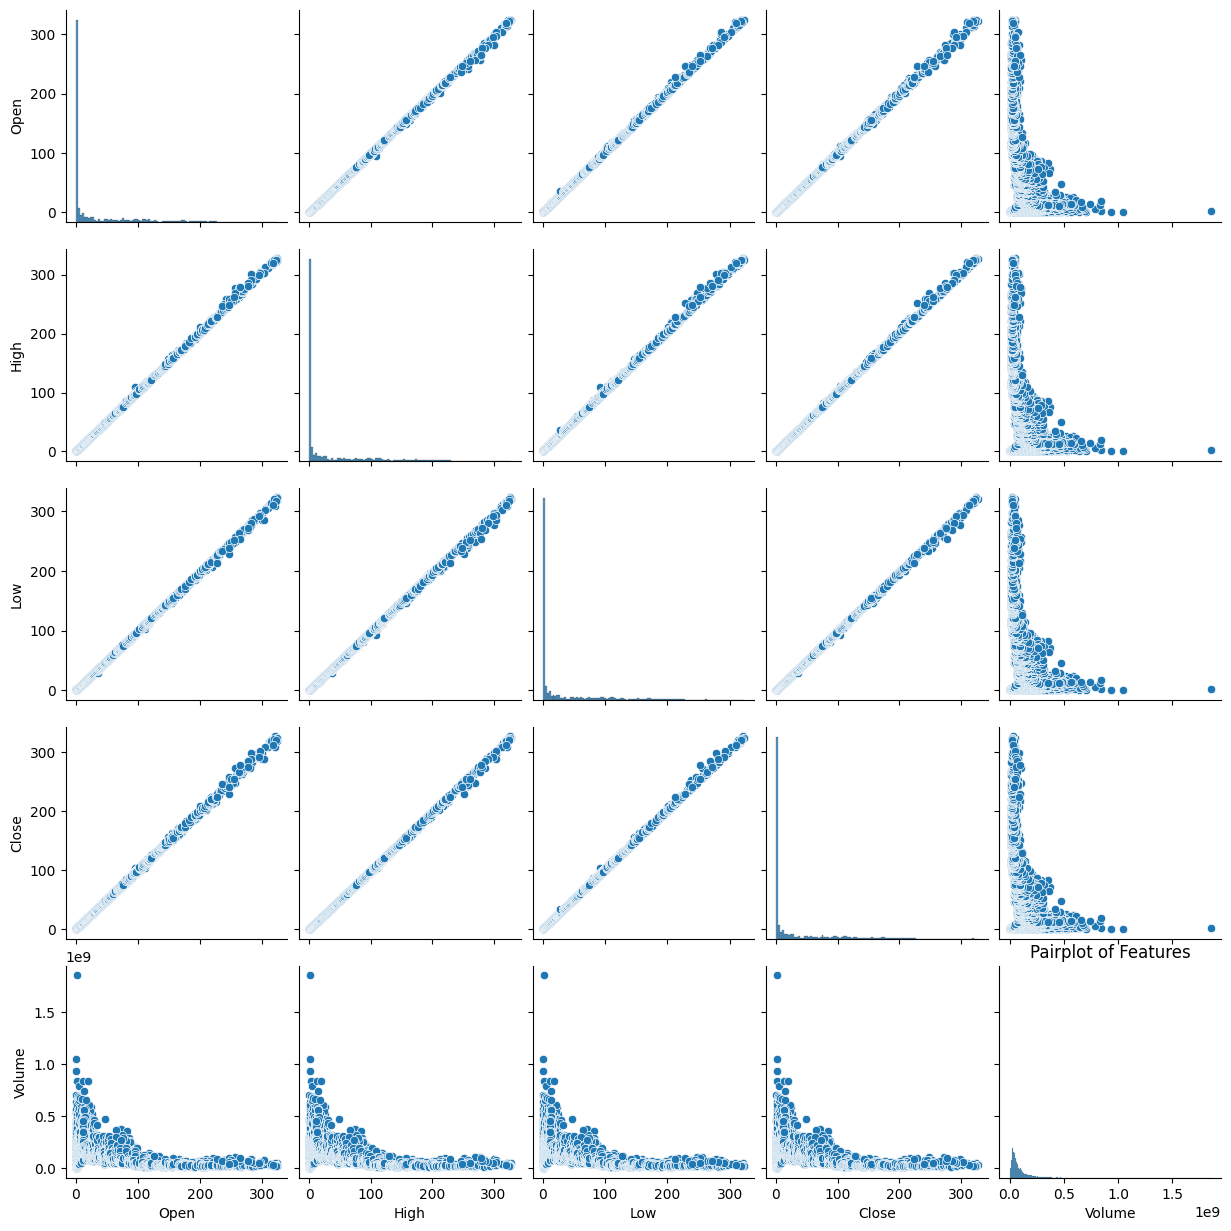

In [55]:
# Plotting Pairplot for correlation visualization
plt.figure(figsize=(10, 8))
sns.pairplot(data[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.title('Pairplot of Features')
plt.show()

In [15]:
# Principal Component Analysis (PCA)
# Separating features and target variable
X = data.drop(['Date', 'Close'], axis=1)
y = data['Close']

In [16]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# Applying PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

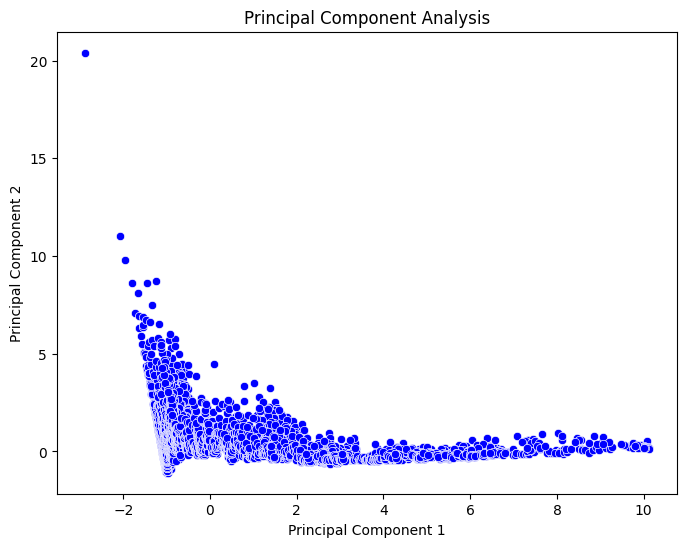

In [56]:
# Plotting PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], color='b')
plt.title('Principal Component Analysis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [18]:
# Stock prediction using Moving Average
data['MA_50'] = data['Close'].rolling(window=50).mean()
data['MA_200'] = data['Close'].rolling(window=200).mean()

In [19]:
# Building a model to predict stock prices
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [20]:
# Training a linear regression model
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [21]:
# Testing the accuracy of the model
y_pred = model1.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Model 1):", mse)

Mean Squared Error (Model 1): 0.4907037863067725


In [22]:
# Implementing a second model
# Building and training the second model
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [23]:
# Testing the accuracy of the second model
y_pred2 = model2.predict(X_test)
mse2 = mean_squared_error(y_test, y_pred2)
print("Mean Squared Error (Model 2):", mse2)

Mean Squared Error (Model 2): 0.4907037863067725


In [24]:
# Comparing both models
print("Model 1 MSE:", mse)
print("Model 2 MSE:", mse2)

Model 1 MSE: 0.4907037863067725
Model 2 MSE: 0.4907037863067725


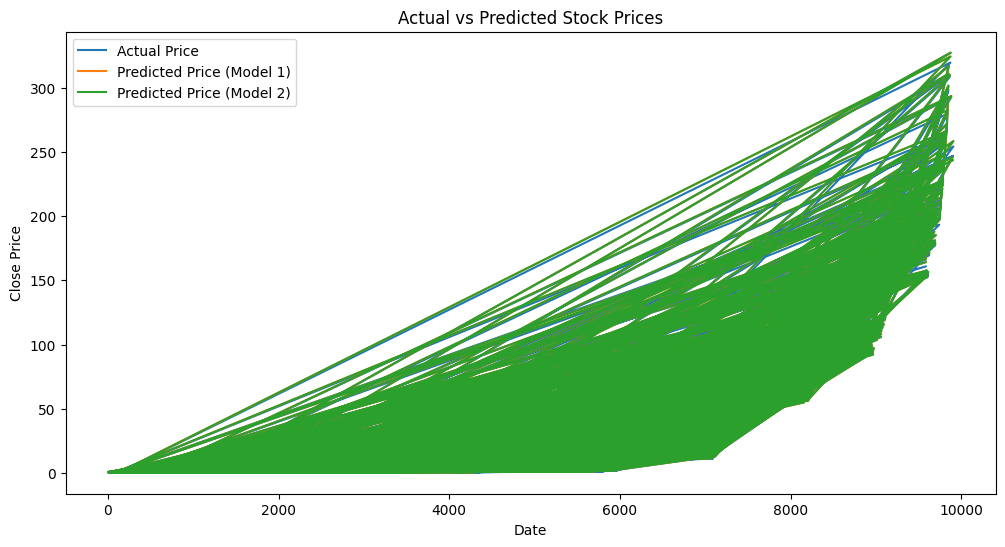

In [25]:
# Results
# Plotting actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Price')
plt.plot(y_test.index, y_pred, label='Predicted Price (Model 1)')
plt.plot(y_test.index, y_pred2, label='Predicted Price (Model 2)')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [86]:
from sklearn.ensemble import GradientBoostingRegressor

In [89]:
if sample_count_difference > 0:
    # Remove excess samples from X
    X = X.iloc[:y.shape[0], :]  # Keep the first n samples in X
elif sample_count_difference < 0:
    # Remove excess samples from y
    y = y.iloc[:X.shape[0]]  # Keep the first n samples in y



Mean Squared Error (Gradient Boosting): 3.0206736699936845


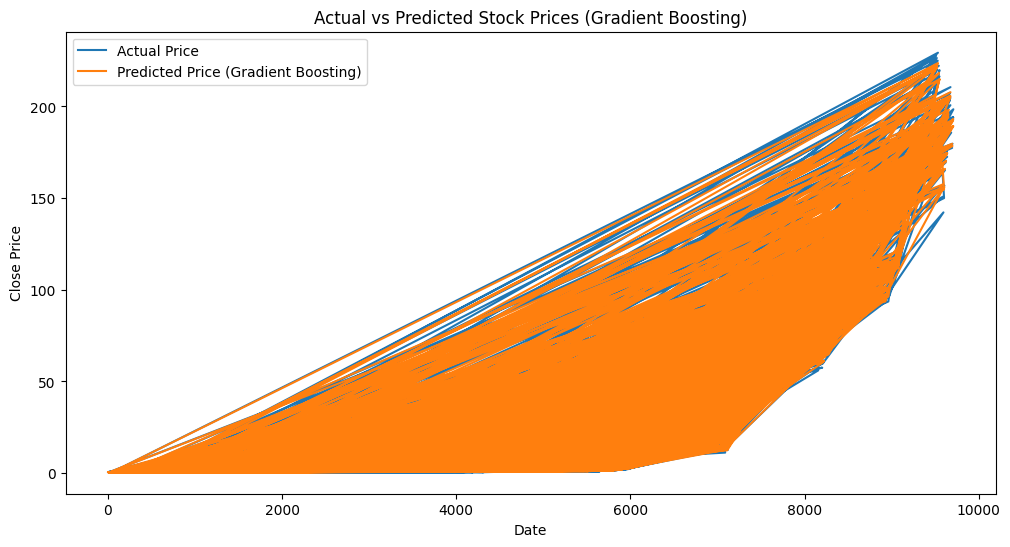

In [90]:


# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)

# Predicting stock prices using the Gradient Boosting Regressor model
y_pred_gb = gb_model.predict(X_test)

# Evaluating the Gradient Boosting Regressor model
mse_gb = mean_squared_error(y_test, y_pred_gb)
print("Mean Squared Error (Gradient Boosting):", mse_gb)

# Plotting actual vs predicted prices for Gradient Boosting model
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Price')
plt.plot(y_test.index, y_pred_gb, label='Predicted Price (Gradient Boosting)')
plt.title('Actual vs Predicted Stock Prices (Gradient Boosting)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


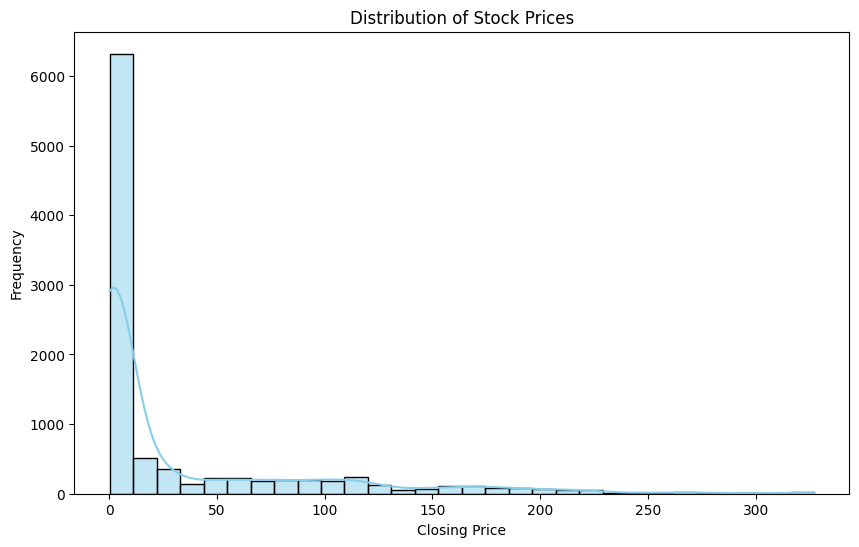

In [91]:
#Distribution of stock prices
plt.figure(figsize=(10, 6))
sns.histplot(data['Close'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Stock Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()
